# **Import the dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/kaggle/input/final-data-no-pca/final_data_no_PCA.csv')
print(df.shape)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/final-data-no-pca/final_data_no_PCA.csv'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML-FinalProject/final_data_no_PCA.csv')
print(df.shape)
df.head()

(19735, 29)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,NSM,week_status,day_of_week
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,61200,1,0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,61800,1,0
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,62400,1,0
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,63000,1,0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,63600,1,0


In [ ]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df = df.copy()

for i, day in enumerate(days):
    df[f'Day_of_week_{day}'] = (df['day_of_week'] == i).astype(int)

df.drop(columns=['day_of_week'], inplace=True)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Tdewpoint,NSM,week_status,Day_of_week_Monday,Day_of_week_Tuesday,Day_of_week_Wednesday,Day_of_week_Thursday,Day_of_week_Friday,Day_of_week_Saturday,Day_of_week_Sunday
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,5.3,61200,1,1,0,0,0,0,0,0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,5.2,61800,1,1,0,0,0,0,0,0
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,5.1,62400,1,1,0,0,0,0,0,0
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,5.0,63000,1,1,0,0,0,0,0,0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,4.9,63600,1,1,0,0,0,0,0,0


In [ ]:
import pandas as pd

def split_data(df, test_size=0.2):
    test_index = int(len(df) * (1 - test_size))

    train_data = df[:test_index]
    test_data = df[test_index:]

    return train_data, test_data

train_data, test_data = split_data(df)

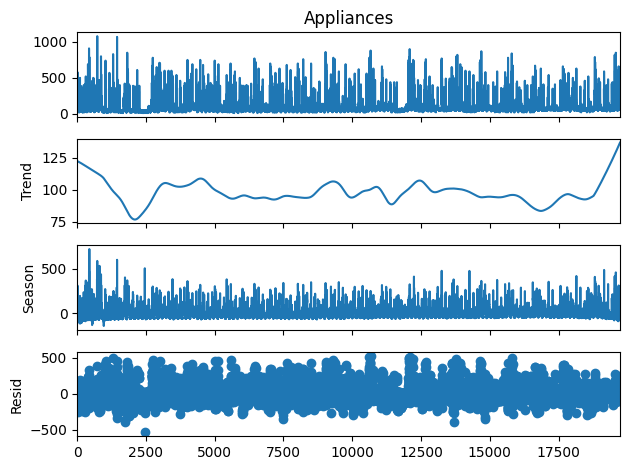

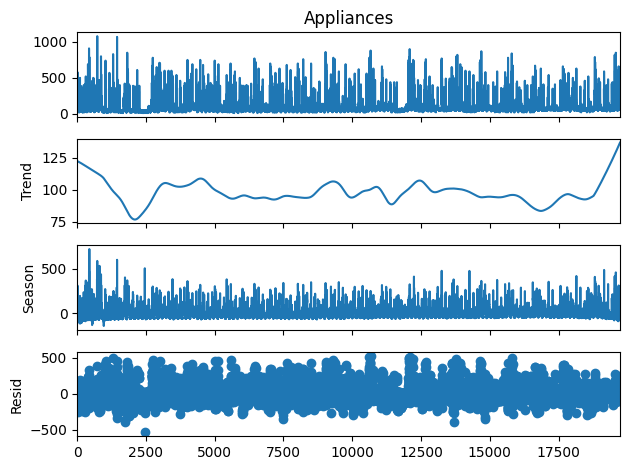

In [ ]:
from statsmodels.tsa.seasonal import STL

# Apply STL decomposition
stl = STL(df['Appliances'], period=1008)
result = stl.fit()

# Extract components
trend = result.trend
seasonality = result.seasonal
residuals = result.resid

result.plot()

In [ ]:
import numpy as np
from scipy.fft import fft

# Perform FFT
fft_result = fft(df['Appliances'])
frequencies = np.fft.fftfreq(len(df['Appliances']))

# Find the dominant frequency (excluding zero)
dominant_freq = frequencies[np.argmax(np.abs(fft_result[1:])) + 1]
seasonal_period = int(1 / dominant_freq)  # Convert frequency to period
print(f"Detected Seasonal Period: {seasonal_period}")

Detected Seasonal Period: 144


In [ ]:
from scipy.signal import periodogram

freqs, power = periodogram(df['Appliances'])
dominant_freq = freqs[np.argmax(power)]
seasonal_period = int(1 / dominant_freq)
print(f"Detected Seasonal Period: {seasonal_period}")

Detected Seasonal Period: 144


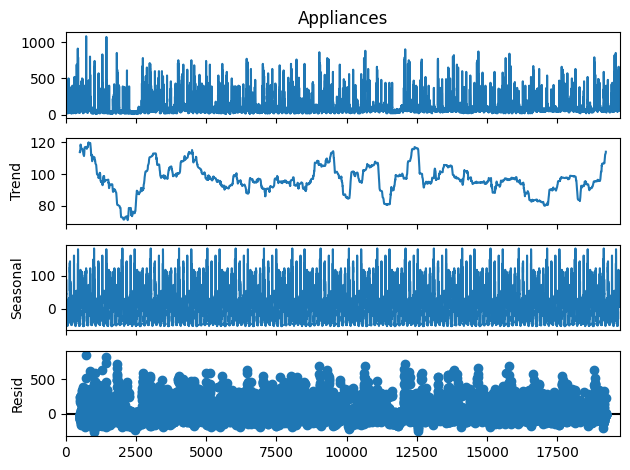

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_period = 1008

result = seasonal_decompose(df['Appliances'], period=seasonal_period, model='additive')
result.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

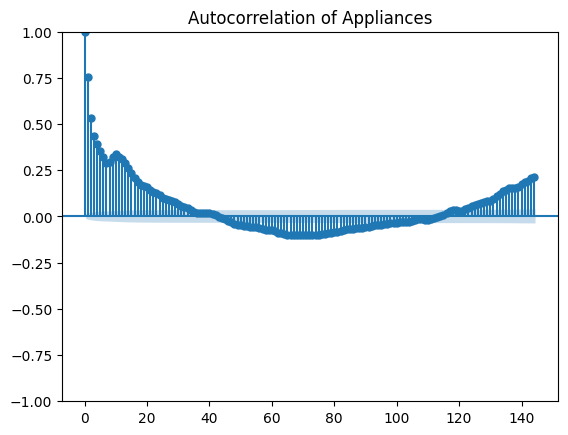

[1.         0.75296333 0.53395633 ... 0.12938288 0.13326266 0.13315135]


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming df['Appliances'] is your target column
plt.figure(figsize=(10, 6))
plot_acf(df['Appliances'], lags= 144)  # Adjust `lags` as needed
plt.title('Autocorrelation of Appliances')
plt.show()

from statsmodels.tsa.stattools import acf

# Compute autocorrelation values
acf_values = acf(df['Appliances'], nlags= 2 * 1080)  # Adjust `nlags` as needed
print(acf_values)


In [ ]:
df_input = df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_input_scaled = scaler.fit_transform(df_input)

In [ ]:
features = df_input_scaled
target = df_input_scaled[:,0]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123, shuffle = False)

In [ ]:
x_test.shape

(3947, 35)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

win_length = 77
batch_size = 32
num_features = 35

train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate = 1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate = 1, batch_size=batch_size)

In [ ]:
train_generator[0]

(array([[[0.04672897, 0.42857143, 0.32734952, ..., 0.        ,
          0.        , 0.        ],
         [0.04672897, 0.42857143, 0.32734952, ..., 0.        ,
          0.        , 0.        ],
         [0.03738318, 0.42857143, 0.32734952, ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.02803738, 0.        , 0.34248504, ..., 0.        ,
          0.        , 0.        ],
         [0.02803738, 0.        , 0.33896515, ..., 0.        ,
          0.        , 0.        ],
         [0.02803738, 0.        , 0.33896515, ..., 0.        ,
          0.        , 0.        ]],
 
        [[0.04672897, 0.42857143, 0.32734952, ..., 0.        ,
          0.        , 0.        ],
         [0.03738318, 0.42857143, 0.32734952, ..., 0.        ,
          0.        , 0.        ],
         [0.03738318, 0.57142857, 0.32734952, ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.02803738, 0.        , 0.33896515, ..., 0.        ,
          0.        , 0.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout, LeakyReLU, Dropout, SpatialDropout1D
from tensorflow.keras.activations import gelu

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(win_length, num_features)))
model.add(tf.keras.layers.LSTM(units=256, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(negative_slope=0.3))
model.add(SpatialDropout1D(0.1))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.LSTM(units=256, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(negative_slope=0.3))
model.add(SpatialDropout1D(0.1))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.LSTM(units=128, return_sequences=False))
model.add(tf.keras.layers.LeakyReLU(negative_slope=0.3))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=1))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout, LeakyReLU, Dropout

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(win_length, num_features)))
model.add(tf.keras.layers.GRU(units=256, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(negative_slope=0.3))
model.add(SpatialDropout1D(0.2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.GRU(units=256, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(negative_slope=0.3))
model.add(SpatialDropout1D(0.2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.GRU(units=128, return_sequences=False))
model.add(tf.keras.layers.LeakyReLU(negative_slope=0.3))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, 77, 256)             │         299,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_15 (LeakyReLU)           │ (None, 77, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_10                 │ (None, 77, 256)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 77, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 77, 256)             │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_16 (LeakyReLU)           │ (None, 77, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_11                 │ (None, 77, 256)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 77, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_17 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,021,569 (3.90 MB)

 Trainable params: 1,021,569 (3.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
initial_learning_rate = 0.001

optimizer = tf.keras.optimizers.Nadam(learning_rate=initial_learning_rate)

model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=optimizer,
    metrics=[tf.metrics.MeanAbsoluteError()]
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(train_generator,
                              epochs=100,
                              validation_data=test_generator,
                              shuffle=False,
                              callbacks=[early_stopping])

Epoch 1/100
  5/491 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - loss: 0.0444 - mean_absolute_error: 0.1419

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - loss: 0.0137 - mean_absolute_error: 0.0684 - val_loss: 0.0062 - val_mean_absolute_error: 0.0448
Epoch 2/100
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 0.0105 - mean_absolute_error: 0.0609 - val_loss: 0.0060 - val_mean_absolute_error: 0.0426
Epoch 3/100
491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - loss: 0.0094 - mean_absolute_error: 0.0572 - val_loss: 0.0051 - val_mean_absolute_error: 0.0327
Epoch 4/100
491/491 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 0.0071 - mean_absolute_error: 0.0481 - val_loss: 0.0036 - val_mean_absolute_error: 0.0275
Epoch 5/100
491/491 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 0.0054 - mean_absolute_error: 0.0401 - val_loss: 0.0038 - val_mean_absolute_error: 0.0295
Epoch 6/100
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 0.0050 - mean_absolute_error: 0.0383 - val_loss: 0.0033 - val_mean_absolute_error: 0.0263
Epoch 7/100
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0049 - mean_absolute_error: 0.

In [ ]:
model.evaluate(test_generator, verbose = 0)
predictions = model.predict(test_generator)

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
x_test

array([[0.3364486 , 0.        , 0.48574446, ..., 0.        , 1.        ,
        0.        ],
       [0.54205607, 0.        , 0.48574446, ..., 0.        , 1.        ,
        0.        ],
       [0.28971963, 0.        , 0.48574446, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.24299065, 0.14285714, 0.91974657, ..., 1.        , 0.        ,
        0.        ],
       [0.38317757, 0.14285714, 0.91974657, ..., 1.        , 0.        ,
        0.        ],
       [0.39252336, 0.14285714, 0.91974657, ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
x_test[:,1:][win_length:]
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])], axis=1)

In [ ]:
rev_trans = scaler.inverse_transform(df_pred)

In [ ]:
df_final = df_input[predictions.shape[0]*-1:]
df_final['Appliances_Pred'] = rev_trans[:,0]

<ipython-input-136-9bfc7ac67a30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Appliances_Pred'] = rev_trans[:,0]


<Axes: >

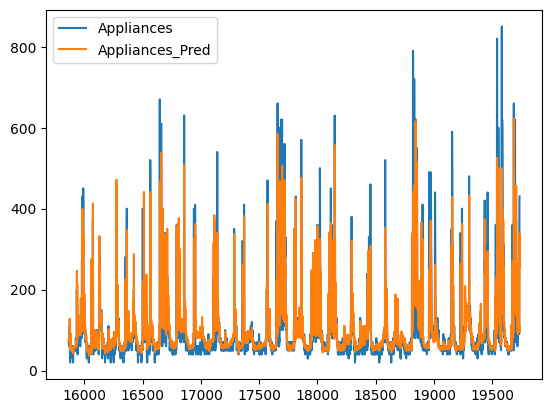

In [ ]:
df_final[['Appliances', 'Appliances_Pred']].plot()

In [ ]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

LSTM Model Testing RMSE: 55.88999429904508

LSTM Model Testing MAPE: 25.829236383438243%

LSTM Model Testing MAE: 25.942115975558295

LSTM Model Testing R2: 0.5837844016294436


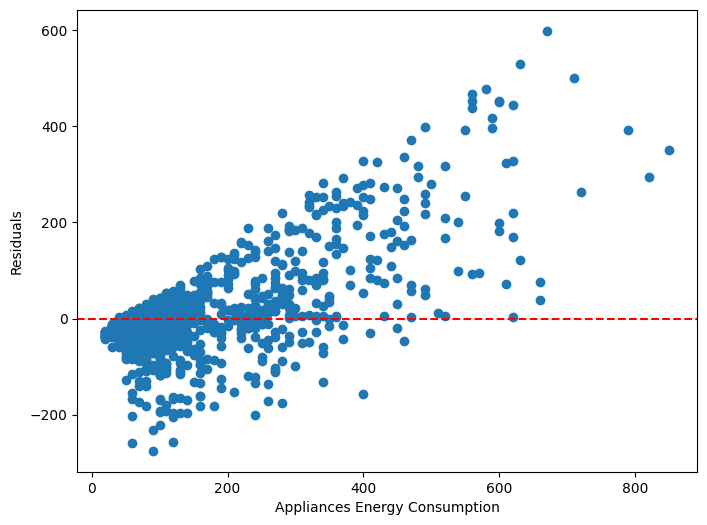

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

residuals = df_final['Appliances'] - df_final['Appliances_Pred']

plt.figure(figsize=(8, 6))
plt.scatter(df_final['Appliances'], residuals)
plt.xlabel("Appliances Energy Consumption")
plt.ylabel("Residuals")
plt.axhline(0, color='red', linestyle='--')

rmse_test_gbm = np.sqrt(mean_squared_error(df_final['Appliances'], df_final['Appliances_Pred']))
print(f"LSTM Model Testing RMSE: {rmse_test_gbm}\n")

mape_test_gbm = mape(df_final['Appliances'], df_final['Appliances_Pred'])
print(f"LSTM Model Testing MAPE: {mape_test_gbm}%\n")

mae_test_gbm = mean_absolute_error(df_final['Appliances'], df_final['Appliances_Pred'])
print(f"LSTM Model Testing MAE: {mae_test_gbm}\n")

r2_test_gbm = r2_score(df_final['Appliances'], df_final['Appliances_Pred'])
print(f"LSTM Model Testing R2: {r2_test_gbm}")